## Lab4 - WordCount on Tweets and WordCloud Generation

#### Include necessary Libraries

In [3]:
library(twitteR)
library(RSQLite)
library(stringr)
library(jsonlite)
library(stringr)
library(wordcloud)
library(tm)
library(SnowballC)
#install.packages("wordcloud", repos='http://cran.us.r-project.org')
#install.packages("tm", repos='http://cran.us.r-project.org')
#install.packages("SnowballC",repos='http://cran.us.r-project.org')
#install.packages("stringr",repos='http://cran.us.r-project.org')

Warning message:
"package 'stringr' was built under R version 3.3.3"Warning message:
"package 'wordcloud' was built under R version 3.3.3"Loading required package: RColorBrewer
Warning message:
"package 'tm' was built under R version 3.3.3"Loading required package: NLP


### References:
#### 1. WordCloud - https://cran.r-project.org/web/packages/wordcloud/wordcloud.pdf & https://www.r-bloggers.com/building-wordclouds-in-r/
#### 2. CSV files - https://cran.r-project.org/doc/manuals/R-data.pdf or http://rprogramming.net/read-csv-in-r/
#### 3. "twitteR.pdf" - http://geoffjentry.hexdump.org/twitteR.pdf

#### Setup Twitter

In [ ]:
setup_twitter_oauth('','','','')

#### Connect to database

In [3]:
db <- dbConnect(SQLite(), dbname='lab4Data.sqlite') #There is another Database Superbowl2.sqlite 
sql_lite_file = tempfile()
register_sqlite_backend('lab4Data.sqlite')

#### Select the query to search

In [ ]:
searchQuery <- "#economy"
searchTweets <- searchTwitter(searchQuery,n=5000)

In [ ]:
head(searchTweets)

#### Store the query in the database

In [ ]:
store_tweets_db(searchTweets)

#### Load from database

In [4]:
from_db = load_tweets_db()
length(from_db)

[1] 10000

#### Convert to a nice dataframe

In [7]:
tweetdF <- twListToDF(from_db)  

In [18]:
#tweetdF[1:1000,]

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
@jamewils Digital payments r forced upon us-ATMs hve no cash! Makng money through money is a financial disaster.We… https://t.co/OO12suhx4x,FALSE,0,jamewils,2017-04-09 04:01:14,TRUE,850913262577176576,850921519110868997,67612556,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",CharouRathore,0,FALSE,FALSE,NA,NA
#Experts state #China’s #economy is ready to crash; hum than what about our economy https://t.co/B2oWwG3EhO,FALSE,1,NA,2017-04-09 04:01:02,FALSE,NA,850921470373056517,NA,"<a href=""http://www.example.com"" rel=""nofollow"">yerissa.melonfield follow</a>",yerissa_blondee,0,FALSE,FALSE,NA,NA
"Progressives Hit Trump Ed Sec with Death Threats, Security Costs $7.8 Million https://t.co/hfofoSfjny #markets #economy",FALSE,0,NA,2017-04-09 04:00:48,FALSE,NA,850921412550430720,NA,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",AlphaTribune,0,FALSE,FALSE,NA,NA
"RT @MarathonWealth: Gundlach's ""...uncanny, almost perfect"" #recession indicator (UER vs 36 month MA) shows US #Economy is still expanding.…",FALSE,0,NA,2017-04-09 04:00:35,FALSE,NA,850921354920579072,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",mkochman1,5,FALSE,FALSE,NA,NA
"""The restructuring and efficiency drive that #Myers led at Lion was also needed across the entire #NewZealand… https://t.co/EkWhlmDJkT",FALSE,0,NA,2017-04-09 03:49:37,TRUE,NA,850918596641292288,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",youcantweettome,0,FALSE,FALSE,NA,NA
RT @Alex_Verbeek: <ed><U+00A0><U+00BC><ed><U+00B7><U+00A8><ed><U+00A0><U+00BC><ed><U+00B7><U+00B3> Five Things You Didn’t Know About Energy in China https://t.co/wiY8M3BXBE #energy #climate #renewables #economy #c…,FALSE,0,NA,2017-04-09 03:47:49,FALSE,NA,850918145640587264,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",KellieRoseWick,30,FALSE,FALSE,NA,NA
If #World #economy is so weak why are World #StockMarkets so strong? https://t.co/4n9SLH7YJl,FALSE,0,NA,2017-04-09 03:43:16,FALSE,NA,850916998179676160,NA,"<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>",tradingpsych01,0,FALSE,FALSE,NA,NA
RT @Alex_Verbeek: <ed><U+00A0><U+00BC><ed><U+00B7><U+00A8><ed><U+00A0><U+00BC><ed><U+00B7><U+00B3> Five Things You Didn’t Know About Energy in China https://t.co/wiY8M3BXBE #energy #climate #renewables #economy #c…,FALSE,0,NA,2017-04-09 03:42:56,FALSE,NA,850916915581042688,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",wiwid_fajria,30,FALSE,FALSE,NA,NA
RT @PHCJam: Devaluation Is No Strategy For Growth - #Economy #CaribbeanBusinessEnvironment #PHC #JAM https://t.co/YFUqtQxVRu,FALSE,0,NA,2017-04-09 03:40:16,FALSE,NA,850916245528600579,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",PHCDesign,1,FALSE,FALSE,NA,NA
RT @PHCJam: CARICOM and Caribbean Economic Development - #Economy #Politics @CARICOMorg #CaribbeanBusinessEnvironment #PHC https://t.co/x0M…,FALSE,0,NA,2017-04-09 03:40:11,FALSE,NA,850916221553971200,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",PHCDesign,1,FALSE,FALSE,NA,NA


#### Collect only text from the tweets

In [31]:
tweetText1 <- tweetdF[1:10000,1]
#head(tweetText1)

In [32]:
#filename<-paste0('tweets10000',as.numeric(Sys.time()),'.json')
#writeLines(tweetText1,conn<-file(filename))

#### Pick words with only #hashtags from text

In [36]:
tweetEdited <- tweetText1[grep("^#", tweetText1)]

In [48]:
filename<-paste0('tweetsedited10000.json')

In [49]:
#writeLines(tweetEdited,conn<-file(filename))

In [78]:
#words <- str_extract_all(tweetText1,"(?<=@)\\w+")
#words[words == ""] <- NA

Warning message:
"closing unused connection 8 (tweetsedited.json)"

[[1]]
[[1]][[1]]
[1] "jamewils"

[[1]][[2]]
character(0)

[[1]][[3]]
character(0)

[[1]][[4]]
[1] "MarathonWealth"

[[1]][[5]]
character(0)

[[1]][[6]]
[1] "Alex_Verbeek"

[[1]][[7]]
character(0)

[[1]][[8]]
[1] "Alex_Verbeek"

[[1]][[9]]
[1] "PHCJam"

[[1]][[10]]
[1] "PHCJam"     "CARICOMorg"

[[1]][[11]]
[1] "PHCJam"

[[1]][[12]]
character(0)

[[1]][[13]]
character(0)

[[1]][[14]]
[1] "CARICOMorg"

[[1]][[15]]
character(0)

[[1]][[16]]
character(0)

[[1]][[17]]
[1] "bigtickHK"

[[1]][[18]]
[1] "bigtickHK"

[[1]][[19]]
[1] "draco333999"

[[1]][[20]]
[1] "PHCJam"

[[1]][[21]]
[1] "IBNMoney_com"

[[1]][[22]]
[1] "IBNMoney_com"

[[1]][[23]]
[1] "IBNMoney_com"

[[1]][[24]]
character(0)

[[1]][[25]]
[1] "eleazarjgomez"

[[1]][[26]]
character(0)

[[1]][[27]]
character(0)

[[1]][[28]]
character(0)

[[1]][[29]]
[1] "Wonolo"         "talentedladies"

[[1]][[30]]
character(0)

[[1]][[31]]
character(0)

[[1]][[32]]
character(0)

[[1]][[33]]
[1] "draco333999"

[[1]][[34]]
[1] "WillemTait"

[[1]][[35]]
character(0)

[[1]][[36]]
character(0)

[[1]][[37]]
character(0)

[[1]][[38]]
[1] "IBNMoney_com"

[[1]][[39]]
[1] "IBNMoney_com"

[[1]][[40]]
[1] "SEVENCLOVERS"    "USARedOrchestra" "SEVENCLOVERS"   

[[1]][[41]]
[1] "USARedOrchestra" "SEVENCLOVERS"   

[[1]][[42]]
[1] "swiftplatt"    "upsetthesetup" "jteeDC"       

[[1]][[43]]
character(0)

[[1]][[44]]
[1] "marklittlenews" "NiemanReports" 

[[1]][[45]]
character(0)

[[1]][[46]]
character(0)

[[1]][[47]]
character(0)

[[1]][[48]]
character(0)

[[1]][[49]]
character(0)

[[1]][[50]]
character(0)

[[1]][[51]]
character(0)

[[1]][[52]]
character(0)

[[1]][[53]]
[1] "guardian"

[[1]][[54]]
character(0)

[[1]][[55]]
character(0)

[[1]][[56]]
character(0)

[[1]][[57]]
character(0)

[[1]][[58]]
character(0)

[[1]][[59]]
[1] "futuresoption"

[[1]][[60]]
[1] "Omkar_Raii"

[[1]][[61]]
[1] "BoomDoomEconomy"

[[1]][[62]]
character(0)

[[1]][[63]]
[1] "BoomDoomEconomy"

[[1]][[64]]
[1] "BoomDoomEconomy"

[[1]][[65]]
[1] "BoomDoomEconomy"

[[1]][[66]]
character(0)

[[1]][[67]]
[1] "saul42"

[[1]][[68]]
character(0)

[[1]][[69]]
character(0)

[[1]][[70]]
character(0)

[[1]][[71]]
character(0)

[[1]][[72]]
character(0)

[[1]][[73]]
[1] "BoomDoomEconomy"

[[1]][[74]]
character(0)

[[1]][[75]]
character(0)

[[1]][[76]]
character(0)

[[1]][[77]]
character(0)

[[1]][[78]]
[1] "arnabch01"       "TheBubbleBubble"

[[1]][[79]]
[1] "BoomDoomEconomy"

[[1]][[80]]
character(0)

[[1]][[81]]
[1] "bigtickHK"

[[1]][[82]]
[1] "arnabch01"

[[1]][[83]]
[1] "BoomDoomEconomy"

[[1]][[84]]
character(0)

[[1]][[85]]
[1] "arnabch01"

[[1]][[86]]
[1] "BoomDoomEconomy"

[[1]][[87]]
character(0)

[[1]][[88]]
[1] "BoomDoomEconomy"

[[1]][[89]]
character(0)

[[1]][[90]]
[1] "BoomDoomEconomy"

[[1]][[91]]
character(0)

[[1]][[92]]
[1] "HLavoix"  "metanoik"

[[1]][[93]]
[1] "OspreyFlyer"

[[1]][[94]]
[1] "MatrixMarkets"

[[1]][[95]]
[1] "BoomDoomEconomy"

[[1]][[96]]
character(0)

[[1]][[97]]
character(0)

[[1]][[98]]
character(0)

[[1]][[99]]
character(0)

[[1]][[100]]
[1] "MikeQuindazzi"

[[1]][[101]]
[1] "futuresoption"

[[1]][[102]]
character(0)

[[1]][[103]]
[1] "Erus_Energy"

[[1]][[104]]
character(0)

[[1]][[105]]
[1] "shixelsacademy" "TheDrum"       

[[1]][[106]]
[1] "TheDrum"

[[1]][[107]]
[1] "uesugitakashi"

[[1]][[108]]
character(0)

[[1]][[109]]
character(0)

[[1]][[110]]
character(0)

[[1]][[111]]
[1] "GeorgetownCEW"

[[1]][[112]]
[1] "GwenythWR"

[[1]][[113]]
character(0)

[[1]][[114]]
character(0)

[[1]][[115]]
character(0)

[[1]][[116]]
character(0)

[[1]][[117]]
character(0)

[[1]][[118]]
[1] "GwenythWR"

[[1]][[119]]
[1] "futuresoption"

[[1]][[120]]
character(0)

[[1]][[121]]
[1] "futuresoption"

[[1]][[122]]
character(0)

[[1]][[123]]
character(0)

[[1]][[124]]
character(0)

[[1]][[125]]
[1] "Rasmussen_Poll"

[[1]][[126]]
[1] "futuresoption"

[[1]][[127]]
character(0)

[[1]][[128]]
character(0)

[[1]][[129]]
character(0)

[[1]][[130]]
[1] "DollarVigilante"

[[1]][[131]]
[1] "elerianm"

[[1]][[132]]
character(0)


In [ ]:
head(tweetText1)

#### Preprocessing on data

In [102]:
#w <- str_extract_all(tweetText1,"@\\S+")
w <- str_extract_all(tweetText1,"#[:graph:]+")

In [ ]:
#w1

#### Write data (only hashtag words) into a file

In [104]:
lapply(w, write, "test.txt", append=TRUE, ncolumns=1000)

Warning message:
"closing unused connection 7 (tweetsedited.json)"Warning message:
"closing unused connection 6 (tweetsedited.json)"Warning message:
"closing unused connection 5 (tweetsedited.json)"Warning message:
"closing unused connection 4 (tweetsedited.json)"

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

[[31]]
NULL

[[32]]
NULL

[[33]]
NULL

[[34]]
NULL

[[35]]
NULL

[[36]]
NULL

[[37]]
NULL

[[38]]
NULL

[[39]]
NULL

[[40]]
NULL

[[41]]
NULL

[[42]]
NULL

[[43]]
NULL

[[44]]
NULL

[[45]]
NULL

[[46]]
NULL

[[47]]
NULL

[[48]]
NULL

[[49]]
NULL

[[50]]
NULL

[[51]]
NULL

[[52]]
NULL

[[53]]
NULL

[[54]]
NULL

[[55]]
NULL

[[56]]
NULL

[[57]]
NULL

[[58]]
NULL

[[59]]
NULL

[[60]]
NULL

[[61]]
NULL

[[62]]
NULL

[[63]]
NULL

[[64]]
NULL

[[65]]
NULL

[[66]]
NULL

[[67]]
NULL

[[68]]
NULL

[[69]]
NULL

[[70]]
NULL

[[71]]
NULL

[[72]]
NULL

[[73]]
NULL

[[74]]
NULL

[[75]]
NULL

[[76]]
NULL

[[77]]
NULL

[[78]]
NULL

[[79]]
NULL

[[80]]
NULL

[[81]]
NULL

[[82]]
NULL

[[83]]
NULL

[[84]]
NULL

[[85]]
NULL

[[86]]
NULL

[[87]]
NULL

[[88]]
NULL

[[89]]
NULL

[[90]]
NULL

[[91]]
NULL

[[92]]
NULL

[[93]]
NULL

[[94]]
NULL

[[95]]
NULL

[[96]]
NULL

[[97]]
NULL

[[98]]
NULL

[[99]]
NULL

[[100]]
NULL

[[101]]
NULL

[[102]]
NULL

[[103]]
NULL

[[104]]
NULL

[[105]]
NULL

[[106]]
NULL

[[107]]
NULL

[[108]]
NULL

[[109]]
NULL

[[110]]
NULL

[[111]]
NULL

[[112]]
NULL

[[113]]
NULL

[[114]]
NULL

[[115]]
NULL

[[116]]
NULL

[[117]]
NULL

[[118]]
NULL

[[119]]
NULL

[[120]]
NULL

[[121]]
NULL

[[122]]
NULL

[[123]]
NULL

[[124]]
NULL

[[125]]
NULL

[[126]]
NULL

[[127]]
NULL

[[128]]
NULL

[[129]]
NULL

[[130]]
NULL

[[131]]
NULL

[[132]]
NULL

[[133]]
NULL

[[134]]
NULL

[[135]]
NULL

[[136]]
NULL

[[137]]
NULL

[[138]]
NULL

[[139]]
NULL

[[140]]
NULL

[[141]]
NULL

[[142]]
NULL

[[143]]
NULL

[[144]]
NULL

[[145]]
NULL

[[146]]
NULL

[[147]]
NULL

[[148]]
NULL

[[149]]
NULL

[[150]]
NULL

[[151]]
NULL

[[152]]
NULL

[[153]]
NULL

[[154]]
NULL

[[155]]
NULL

[[156]]
NULL

[[157]]
NULL

[[158]]
NULL

[[159]]
NULL

[[160]]
NULL

[[161]]
NULL

[[162]]
NULL

[[163]]
NULL

[[164]]
NULL

[[165]]
NULL

[[166]]
NULL

[[167]]
NULL

[[168]]
NULL

[[169]]
NULL

[[170]]
NULL

[[171]]
NULL

[[172]]
NULL

[[173]]
NULL

[[174]]
NULL

[[175]]
NULL

[[176]]
NULL

[[177]]
NULL

[[178]]
NULL

[[179]]
NULL

[[180]]
NULL

[[181]]
NULL

[[182]]
NULL

[[183]]
NULL

[[184]]
NULL

[[185]]
NULL

[[186]]
NULL

[[187]]
NULL

[[188]]
NULL

[[189]]
NULL

[[190]]
NULL

[[191]]
NULL

[[192]]
NULL

[[193]]
NULL

[[194]]
NULL

[[195]]
NULL

[[196]]
NULL

[[197]]
NULL

[[198]]
NULL

[[199]]
NULL

[[200]]
NULL

[[201]]
NULL

[[202]]
NULL

[[203]]
NULL

[[204]]
NULL

[[205]]
NULL

[[206]]
NULL

[[207]]
NULL

[[208]]
NULL

[[209]]
NULL

[[210]]
NULL

[[211]]
NULL

[[212]]
NULL

[[213]]
NULL

[[214]]
NULL

[[215]]
NULL

[[216]]
NULL

[[217]]
NULL

[[218]]
NULL

[[219]]
NULL

[[220]]
NULL

[[221]]
NULL

[[222]]
NULL

[[223]]
NULL

[[224]]
NULL

[[225]]
NULL

[[226]]
NULL

[[227]]
NULL

[[228]]
NULL

[[229]]
NULL

[[230]]
NULL

[[231]]
NULL

[[232]]
NULL

[[233]]
NULL

[[234]]
NULL

[[235]]
NULL

[[236]]
NULL

[[237]]
NULL

[[238]]
NULL

[[239]]
NULL

[[240]]
NULL

[[241]]
NULL

[[242]]
NULL

[[243]]
NULL

[[244]]
NULL

[[245]]
NULL

[[246]]
NULL

[[247]]
NULL

[[248]]
NULL

[[249]]
NULL

[[250]]
NULL

[[251]]
NULL

[[252]]
NULL

[[253]]
NULL

[[254]]
NULL

[[255]]
NULL

[[256]]
NULL

[[257]]
NULL

[[258]]
NULL

[[259]]
NULL

[[260]]
NULL

[[261]]
NULL

[[262]]
NULL

[[263]]
NULL

[[264]]
NULL

[[265]]
NULL

[[266]]
NULL

[[267]]
NULL

[[268]]
NULL

[[269]]
NULL

[[270]]
NULL

[[271]]
NULL

[[272]]
NULL

[[273]]
NULL

[[274]]
NULL

[[275]]
NULL

[[276]]
NULL

[[277]]
NULL

[[278]]
NULL

[[279]]
NULL

[[280]]
NULL

[[281]]
NULL

[[282]]
NULL

[[283]]
NULL

[[284]]
NULL

[[285]]
NULL

[[286]]
NULL

[[287]]
NULL

[[288]]
NULL

[[289]]
NULL

[[290]]
NULL

[[291]]
NULL

[[292]]
NULL

[[293]]
NULL

[[294]

## Word Cloud

#### Read word and count from csv file

In [1]:
TweetsHashtags <- read.csv("TweetsData.csv")
#TweetsHashtags

#### Generate a wordcloud 

Warning message in brewer.pal(100, "Accent"):
"n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
"

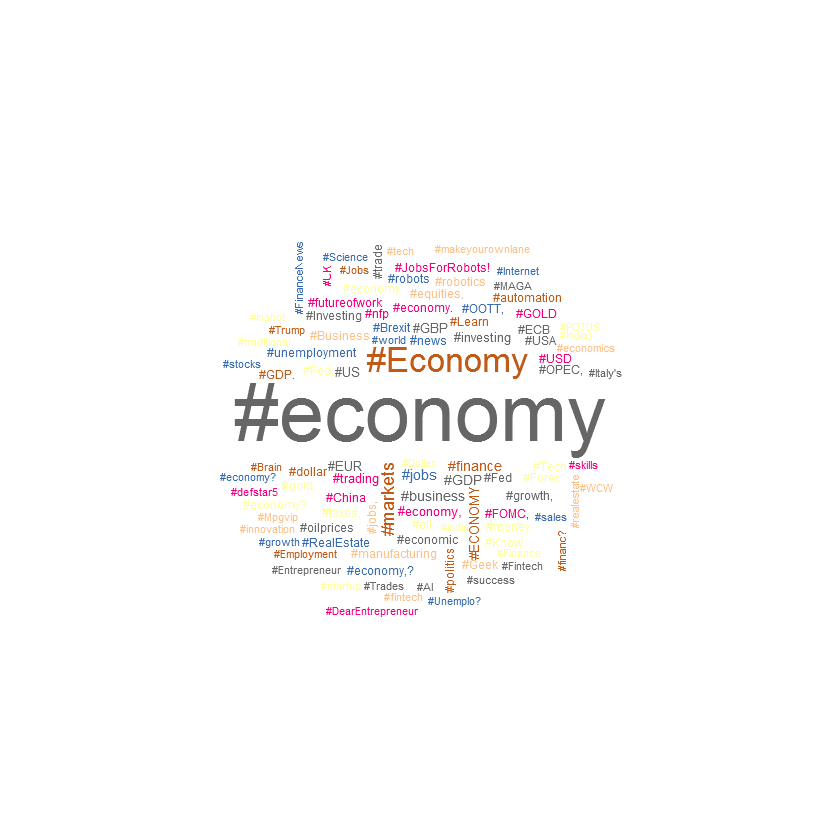

In [4]:
pal <- brewer.pal(100,"Accent")
pal <- pal[-(1:2)]
wordcloud(TweetsHashtags$word,TweetsHashtags$freq,scale=c(4,.5),min.freq=10,max.words=100,
random.order=FALSE, random.color=TRUE, rot.per=.1,pal,
ordered.colors=FALSE,use.r.layout=FALSE,
fixed.asp=TRUE)